In [60]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
dpe = DPE('COM6')

Running <function DPE.init_dut at 0x0E8253D8> with serial
DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
[INFO] Elapsed time = 0.03s
Serial disconnected


In [62]:
dpe.set_clock(50)

Running <function DPE.set_clock at 0x0E825468> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected


Running <function DPE.read at 0x0E8254F8> with serial
[INFO] Elapsed time = 0.25s
Serial disconnected


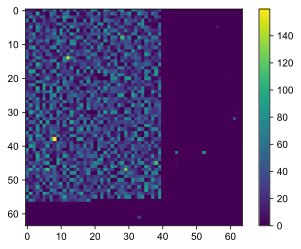

In [63]:
g = dpe.read(2)
plt.imshow(g * 1e6)
plt.colorbar()

Running <function DPE.set_clock at 0x0E825468> with serial
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz
[INFO] Elapsed time = 0.00s
Serial disconnected
5.00-

Text(0, 0.5, 'Current (uA)')

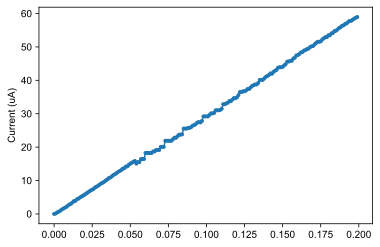

In [58]:
ar=0
r=55
c=2

Vreads = np.arange(0, 0.2, 0.001)
Vgates = [5]

volts_set = []

dpe.set_clock(50)

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
#     dpe.a0.dut.vrefs_defaults()
    dpe.a0.dut.dac_set('DAC_VREF_HI_CMP', 4.0)
    for Vgate in Vgates:
        print(f'{Vgate:.2f}', end='-')
        volts = []
        for vread in Vreads:
            volts.append( dpe.a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=-1) )
        volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
plt.ylabel('Current (uA)')

5.00-

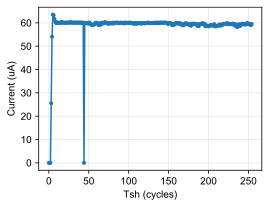

In [59]:
ar=0
r=55
c=2

Tsh_list = np.arange(255)
Vgates = [5]
Vread = 0.2

volts_set = []

with serial.Serial(dpe.ser_name, 9600, timeout=1) as ser:
    dpe.a0.dut.connect(ser)
    for Vgate in Vgates:
        print(f'{Vgate:.2f}', end='-')
        volts = []
        for Tsh in Tsh_list:
            volts.append( dpe.a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=2, Tsh=Tsh) )
        volts_set.append(volts)

plt.figure(figsize=(4,3))

for volts in volts_set:
    plt.plot(Tsh_list, [i* 1e6 for i in volts], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

# plt.savefig('figures/sh_100p.svg')

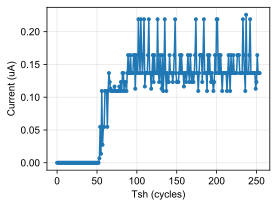

In [147]:
plt.figure(figsize=(4,3))

for volts in volts_set:
    plt.plot(Tsh_list, [i* 1e6 for i in volts], '.-')
    
plt.ylabel('Current (uA)')
plt.xlabel('Tsh (cycles)')
plt.grid(True, alpha=0.3)

# plt.savefig('figures/sh_100p.svg')

Running <function DPE.read at 0x0F9A8F18> with serial
[INFO] Elapsed time = 0.26s
Serial disconnected


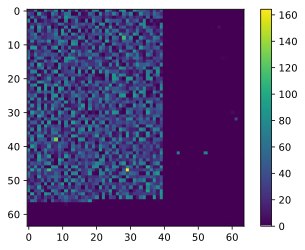

In [127]:
g = dpe.read(2)
plt.imshow(g * 1e6)
plt.colorbar()